# Tesina

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, learning_curve
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, plot_confusion_matrix
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler, SMOTENC
%matplotlib inline

## Introduction

For the report it has been used jupyterlab with python 3.8.
Specific libraries were used for the data structure (pandas) and for  classification (sklearn, imblearn).

In this report, a dataset on medical records of 299 patients who had heart failure, collected during their follow-up period, is analysed.  
It can be found here: http://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

**Thirteen (13) clinical features:**

- **age**: age of the patient (years) 
- **anaemia**: decrease of red blood cells or hemoglobin (boolean) 
- **high blood pressure**: if the patient has hypertension (boolean) 
- **creatinine phosphokinase (CPK)**: level of the CPK enzyme in the blood (mcg/L) 
- **diabetes**: if the patient has diabetes (boolean) 
- **ejection fraction**: percentage of blood leaving the heart at each contraction (percentage) 
- **platelets**: platelets in the blood (kiloplatelets/mL) 
- **sex**: woman or man (binary) 
- **serum creatinine**: level of serum creatinine in the blood (mg/dL) 
- **serum sodium**: level of serum sodium in the blood (mEq/L) 
- **smoking**: if the patient smokes or not (boolean) 
- **time**: follow-up period (days) 
- **[target] death event**: if the patient deceased during the follow-up period (boolean) 

## Data Exploration/Statistics

In [3]:
dtype = {
    "age": "float",
    "anaemia" : "category",
    "creatinine_phosphokinase" : "float",
    "diabetes": "category",
    "ejection_fraction": "float",
    "high_blood_pressure": "category",
    "platelets": "float",
    "serum_creatinine" : "float",
    "serum_sodium": "float",
    "sex": "category",
    "smoking": "category",
    "time": "int",
    "DEATH_EVENT": "category"
}

In [2]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv" 

In [4]:
data_df = pd.read_csv(URL, dtype=dtype)

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    float64 
 1   anaemia                   299 non-null    category
 2   creatinine_phosphokinase  299 non-null    float64 
 3   diabetes                  299 non-null    category
 4   ejection_fraction         299 non-null    float64 
 5   high_blood_pressure       299 non-null    category
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    float64 
 9   sex                       299 non-null    category
 10  smoking                   299 non-null    category
 11  time                      299 non-null    int64   
 12  DEATH_EVENT               299 non-null    category
dtypes: category(6), float64(6), int64(1)
memory usage:

**The dataset has 299 rows and 13 columns.  
As we can see there are no missing data or null values.
To have a better idea of the nature of data let's take a first look at the data to see what it looks like**

In [6]:
data_df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582.0,0,20.0,1,265000.00,1.9,130.0,1,0,4,1
1,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136.0,1,0,6,1
2,65.0,0,146.0,0,20.0,0,162000.00,1.3,129.0,1,1,7,1
3,50.0,1,111.0,0,20.0,0,210000.00,1.9,137.0,1,0,7,1
4,65.0,1,160.0,1,20.0,0,327000.00,2.7,116.0,0,0,8,1
5,90.0,1,47.0,0,40.0,1,204000.00,2.1,132.0,1,1,8,1
6,75.0,1,246.0,0,15.0,0,127000.00,1.2,137.0,1,0,10,1
7,60.0,1,315.0,1,60.0,0,454000.00,1.1,131.0,1,1,10,1
8,65.0,0,157.0,0,65.0,0,263358.03,1.5,138.0,0,0,10,1
9,80.0,1,123.0,0,35.0,1,388000.00,9.4,133.0,1,1,10,1


Looking at this data we can break it down as follows:

Types of attributes:
- Qualitative(Categorical):
  - anaemia
  - diabetes
  - high_blood_pressure
  - sex
  - smoking
  - DEATH_EVENT
- Quantitative(Numerical)
  - age 
  - creatinine_phosphokinase
  - ejection_fraction
  - platelets
  - serum_creatinine
  - serum_sodium
  - time

As we can see from the data some columns(associated to Categorical values) have already been encoded. The encoding process is the transformation of categorical variables to binary or numerical counterparts. Some algorithms can work with categorical data directly. For example, a decision tree can be learned directly from categorical data with no data transform required.  
Many machine learning algorithms or in general algorithms that works on distance-related metrics cannot operate on label data directly. They require all input variables and output variables to be numeric. This means that categorical data must be converted to a numerical form.  
There are several ways to do encoding like "label encoding" or "one hot encoding"
- **Label encoding**: each unique category value is assigned an integer value.
- **One hot encoding**: For categorical variables where no such ordinal relationship exists, the label encoding is not enough.  
  In fact, using this encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results.
  In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.
  The binary variables are often called “dummy variables” in other fields, such as statistics.

**Statistical overview of the data**

Using the "describe" function of Dataframe of pandas we can see some statistics releted to the nature of data:  
**For numerical data:**
- **count**: number of not null values for a specific attribute
- **mean**: the mean of this attribute among all samples
- **std**: the standard deviation of this attribute
- **min**: the minimal value of this attribute
- **25%**: the lower percentile
- **50%**: the median
- **75%**: the upper percentile
- **max**: the maximal value of this attribute

In [7]:
data_df.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


**For categorical data:**
- **count**: number of not null values for a specific attribute
- **unique**: number of distinct values
- **top**: the most common value
- **freq**: the most common value’s frequency

In [7]:
data_df.select_dtypes(include='category').describe()

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
count,299,299,299,299,299,299
unique,2,2,2,2,2,2
top,0,0,0,1,0,0
freq,170,174,194,194,203,203


In [8]:
data_df = data_df.astype({"anaemia": int, "diabetes": int,"high_blood_pressure": int,"sex": int,"smoking": int, "DEATH_EVENT": int})

Let's better visualize this data with graphs

### Distributions

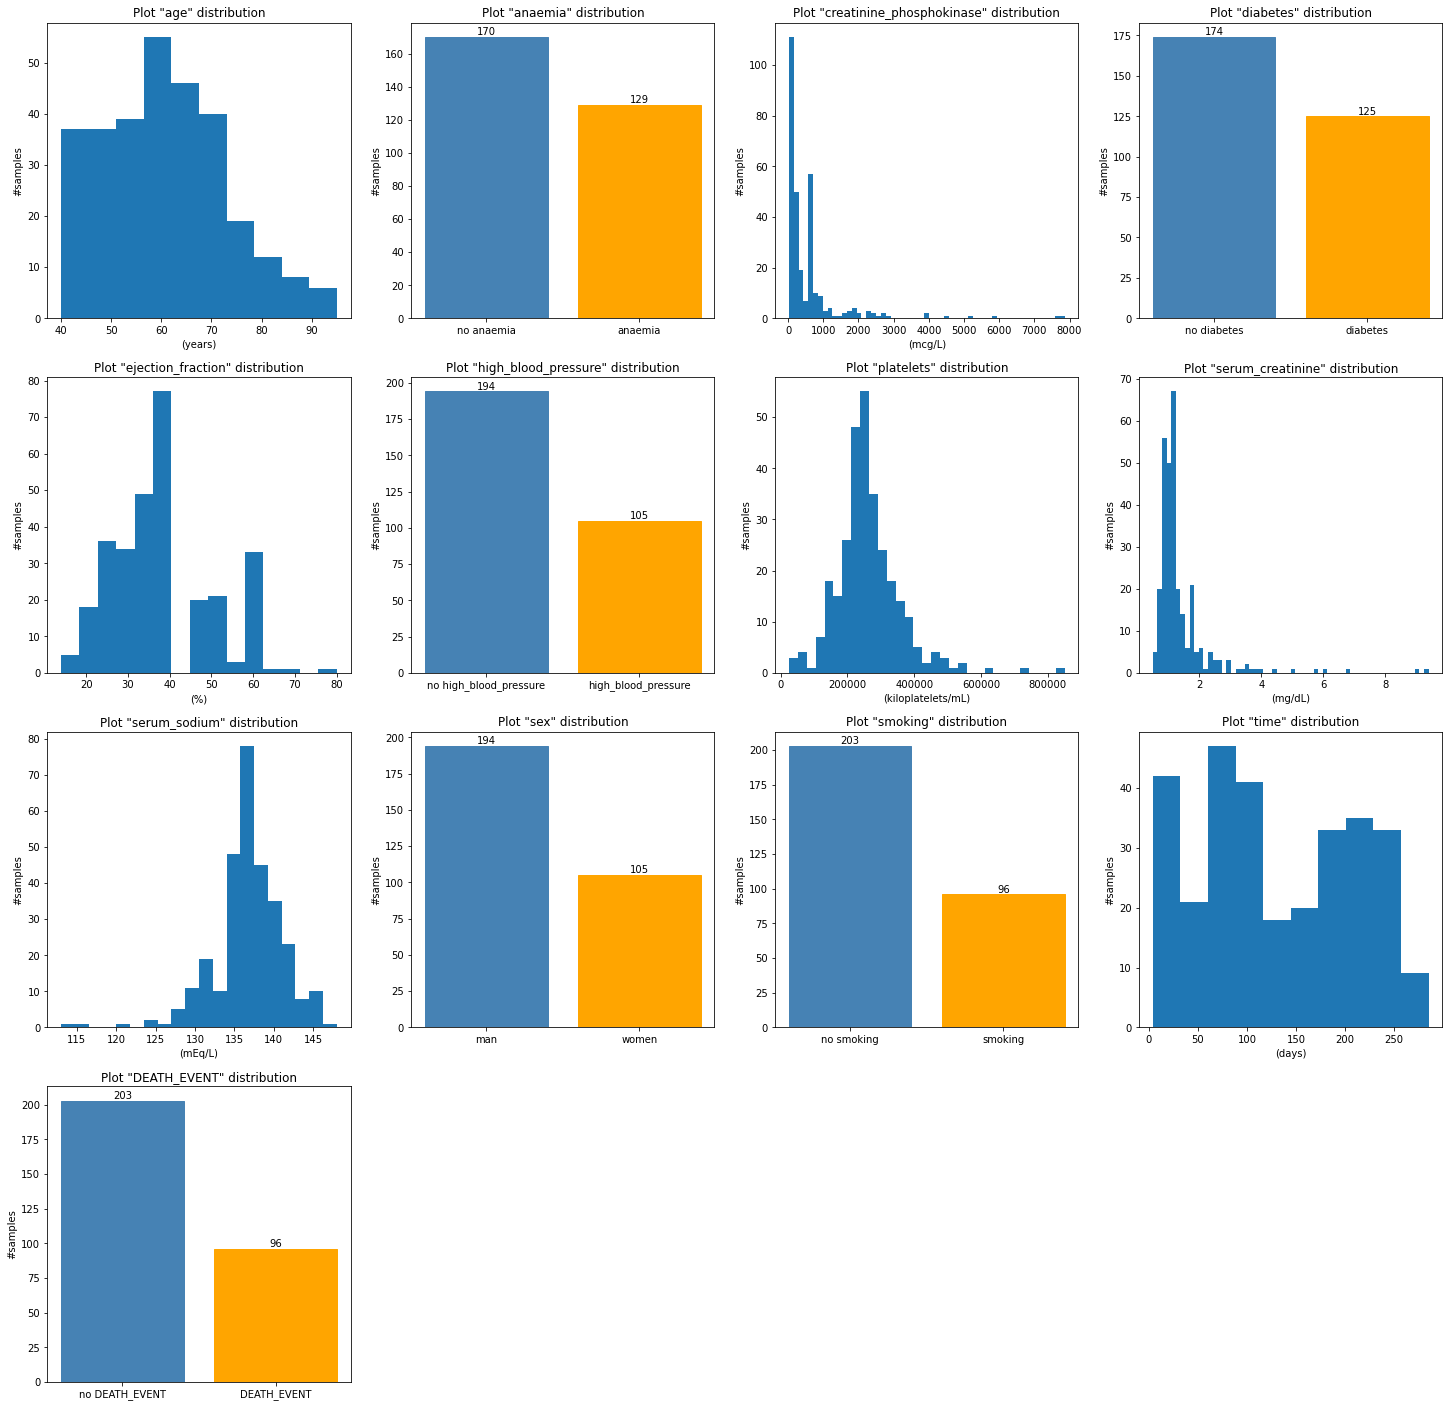

In [9]:
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(25)
measure_dict={
    "age": "(years)",
    "creatinine_phosphokinase": "(mcg/L)",
    "ejection_fraction": "(%)",
    "platelets": "(kiloplatelets/mL)",
    "serum_creatinine": "(mg/dL)",
    "serum_sodium" : "(mEq/L)",
    "time" : "(days)"
}
for i, col in enumerate(data_df.columns):
    plt.subplot(4, 4, i + 1) 
    if len(data_df[col].unique()) == 2:
        y = data_df[col].value_counts()
        if(col =="sex"):
            y_dict = {0: "women", 1: "man"}
        else:
            y_dict = {0: f"no {col}", 1: f"{col}"}
        x =[y_dict[x] for x in y.index]
        bar_graph = plt.bar(x, y)
        bar_graph[0].set_color('steelblue')
        bar_graph[1].set_color('orange')


        for x,y in zip(x,y):

            plt.annotate(y, # this is the text
                         (x,y), # these are the coordinates to position the label
                         textcoords="offset points", # how to position the text
                         xytext=(0,2), # distance from text to points (x,y)
                         ha='center') # horizontal alignment can be left, right or center

    
    else:    
        plt.hist(data_df[col], bins='auto',label= col)
        plt.xlabel(measure_dict[col]) 
           
    plt.ylabel("#samples")  
    plt.title(f'Plot "{col}" distribution')    

plt.show()

As we can see, most of the data refers to people who are 60 years old on average.
Most of the samples (2/3) collected are related to men or people who do not smoke or people who do not have high blood pressure.

In [10]:
death_perc = data_df["DEATH_EVENT"].sum() * 100 / data_df["DEATH_EVENT"].shape[0]
print("Death percentage is %.3f%%." % death_perc)

Death percentage is 32.107%.


As we can see there is an imbalance between the two classes.  
In order to deal with this issue i will use 2 oversampling when building the models.

### Feature-Class Relationships

Now let's see if there are any relationships between the target variable and the predictors

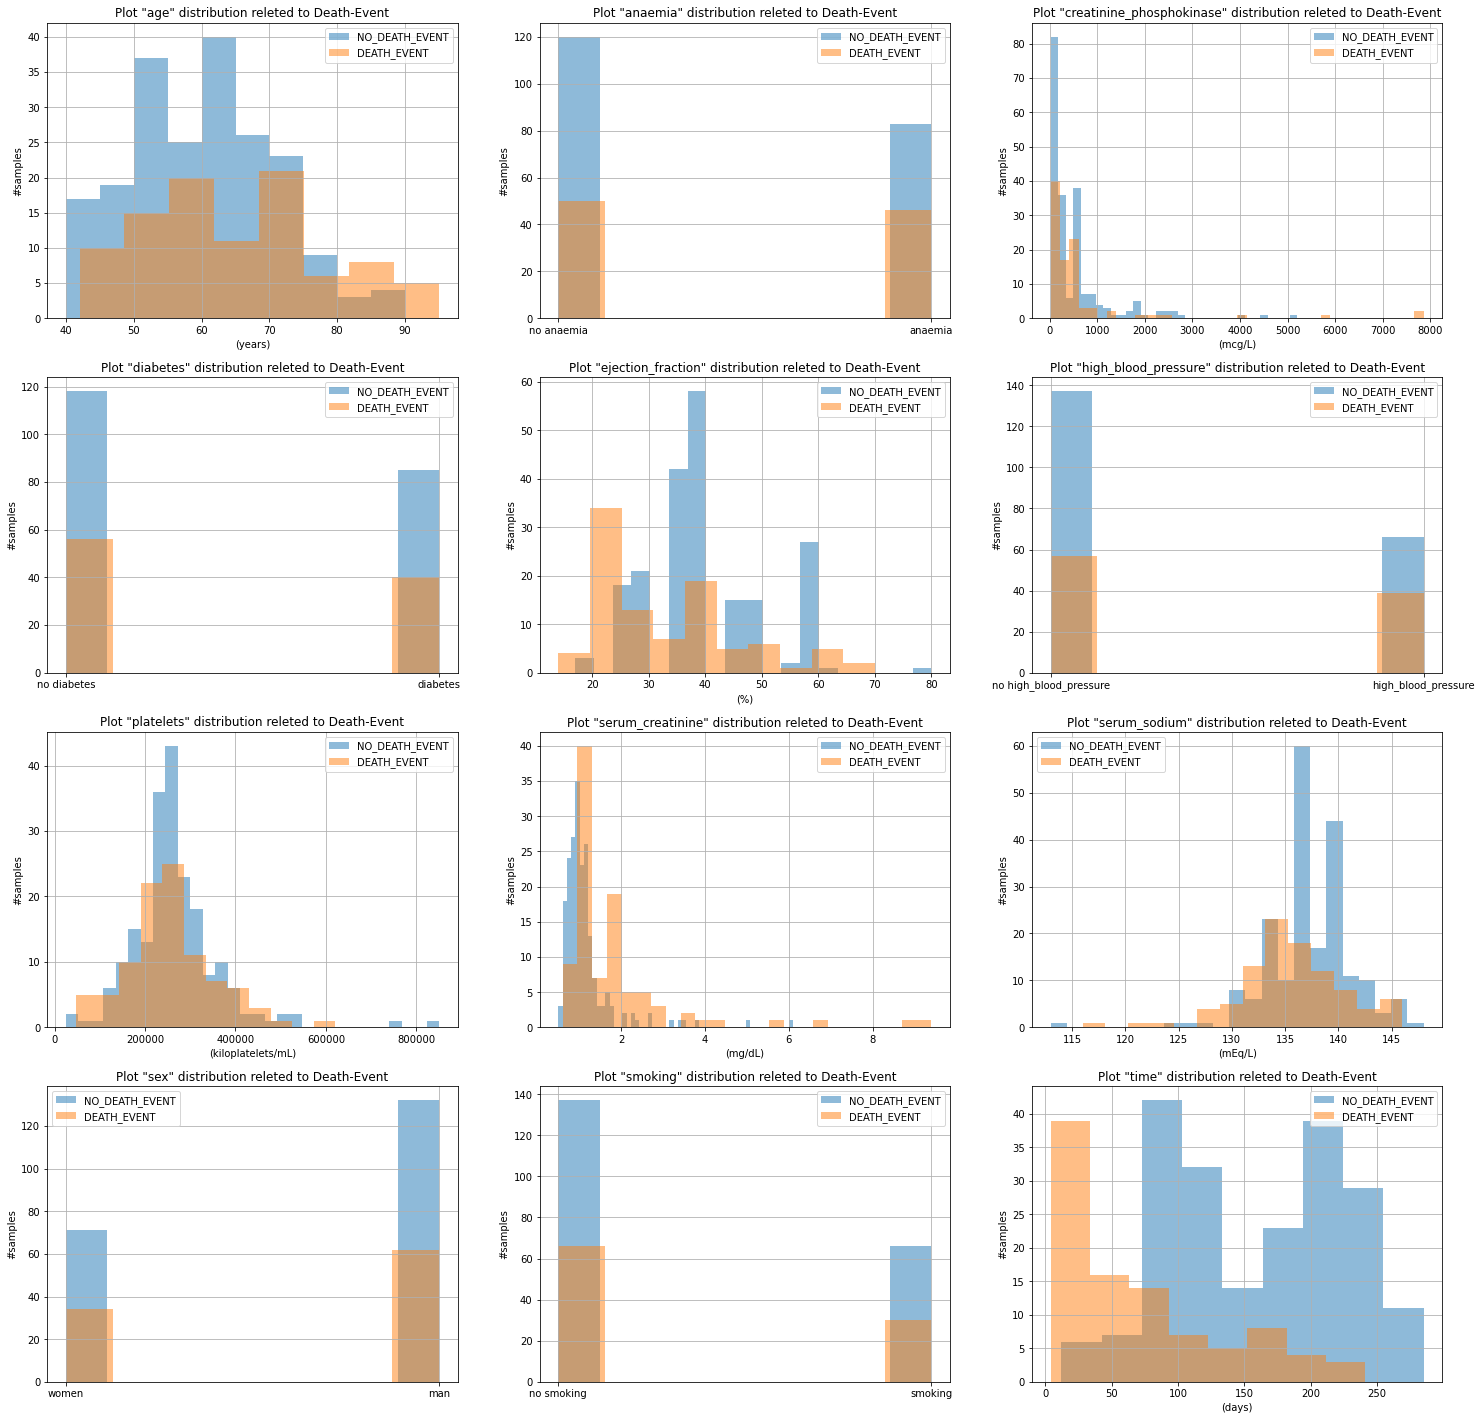

In [11]:
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(25)
for i,k in enumerate(dtype):
    if(k != "DEATH_EVENT"):
        ax = plt.subplot(4, 3, i+1)
        data_df.groupby("DEATH_EVENT")[k].hist(alpha= 0.5, bins="auto",legend = True,ax = ax)
        if len(data_df[k].unique()) == 2:
            if(k =="sex"):
                 my_xticks = ['women','man']
            else:
                my_xticks = [f"no {k}", f"{k}"]
       
            plt.xticks([0,1], my_xticks)
           
        plt.ylabel("#samples")
        plt.xlabel(f'{measure_dict[k] if k in measure_dict else ""}')
        plt.title(f'Plot "{k}" distribution releted to Death-Event')
        l=plt.legend()
        l.get_texts()[0].set_text('NO_DEATH_EVENT')
        l.get_texts()[1].set_text('DEATH_EVENT')

plt.show()
#data_df.groupby("DEATH_EVENT").diabetes.value_counts()

There are some very interesting histograms.  
As we can see in the age histogram, multiple death events are associated with age values above 80.  
In the histogram of the ejection fraction we can see that more death events are associated with percentages of 20-25%.  
In the histogram of serum creatinine we can see that more death events are associated with values in the range of 1,8  - 3.0 mg/dL  
In the histogram of time we can see that more death events are associated with the first 75 days of follow-up period  

Next, we take a look at the box plots for each feature. A box plot visualizes the following statistics:  

- median
- the first quartile (Q1) and the third quartile (Q3) building the interquartile range (IQR)
- the lower fence (Q1 - 1.5 IQR) and the upper fence (Q3 + 1.5 IQR)

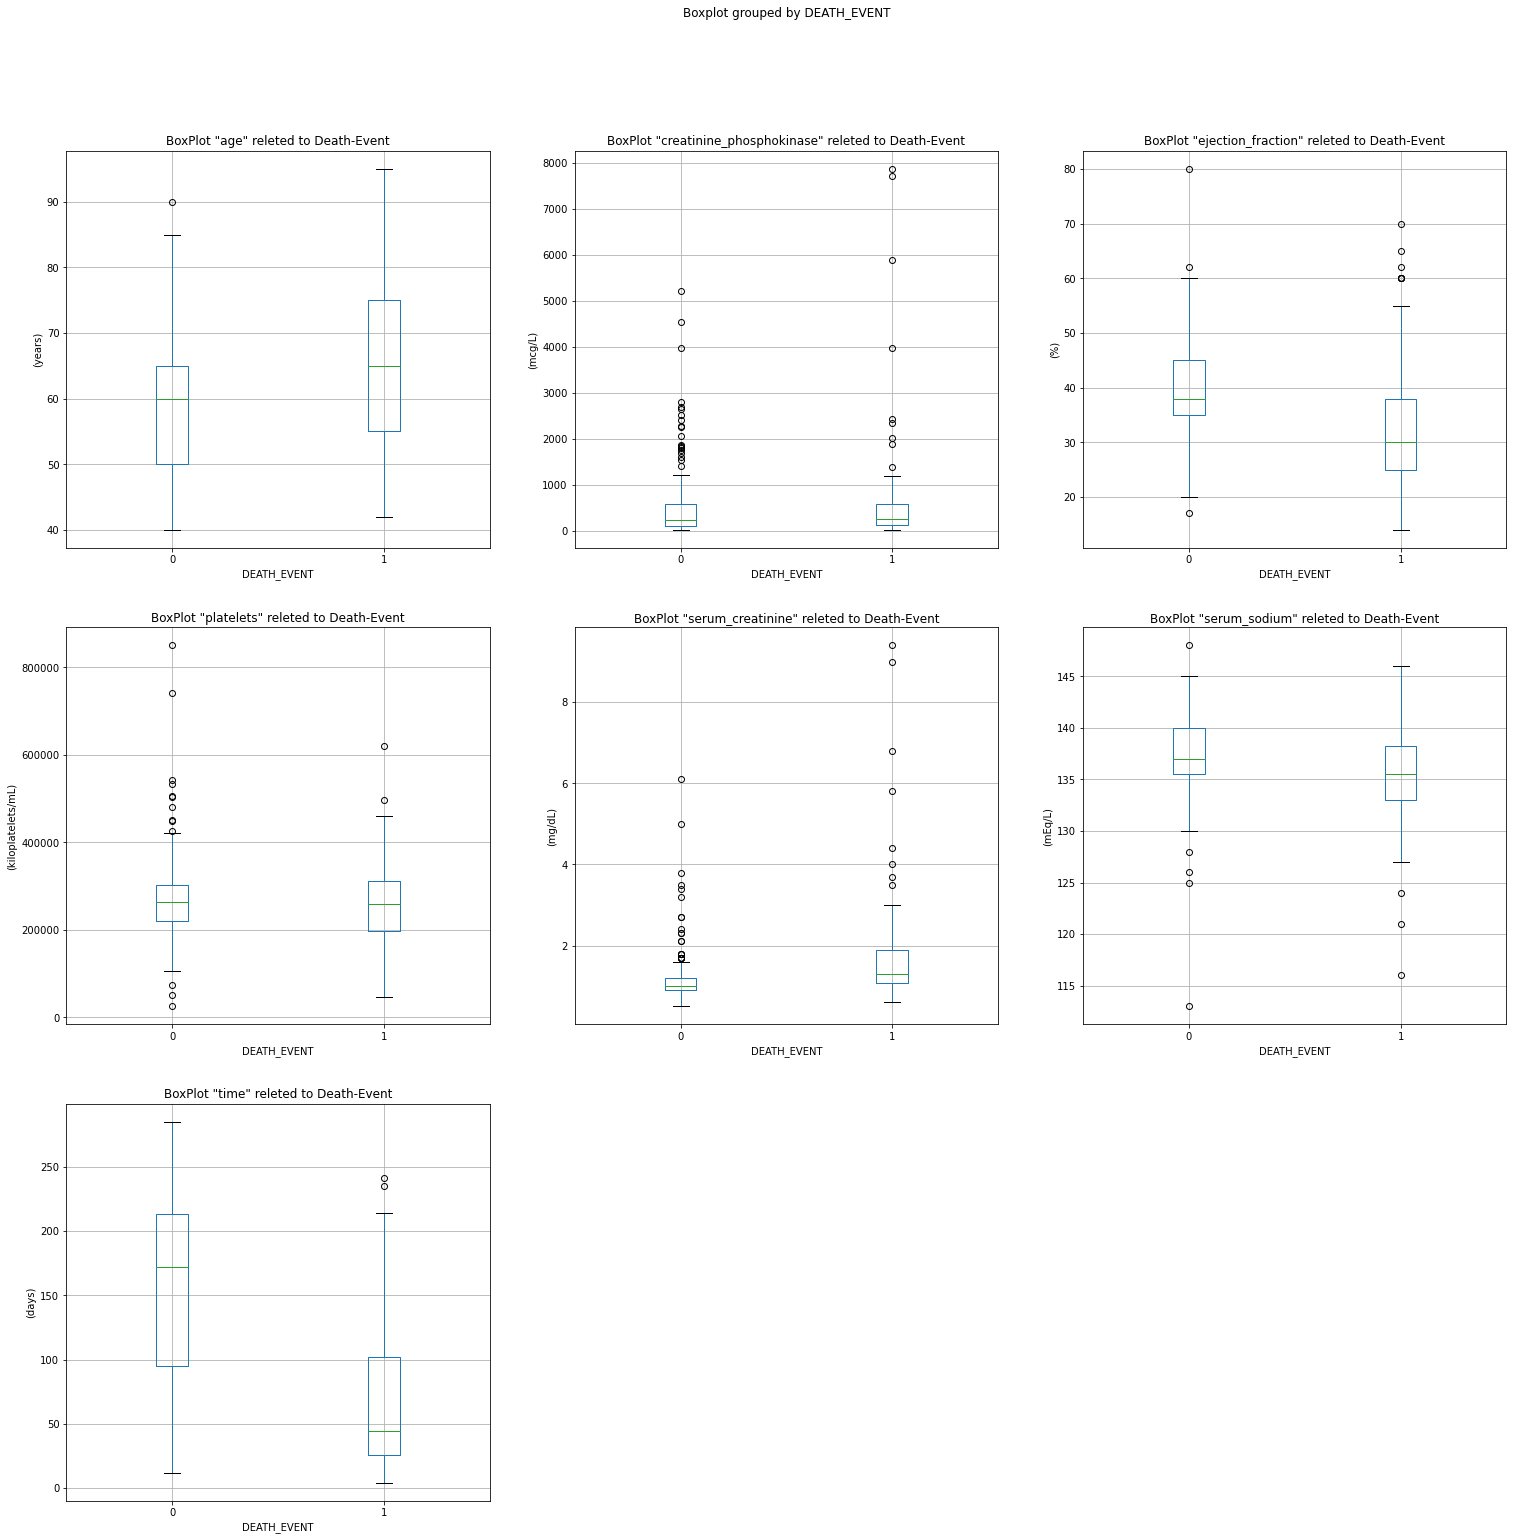

In [12]:
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(25)
outliers = {}
for i,k in enumerate(measure_dict):
    if((k != "DEATH_EVENT")  ):
        ax = plt.subplot(3, 3, i+1)
        bf = data_df.boxplot(column=k, by="DEATH_EVENT",ax = ax, return_type='both')
        outliers[k] = bf
        plt.xlabel("DEATH_EVENT")
        plt.ylabel(f'{measure_dict[k] if k in measure_dict else ""}')
        plt.title(f'BoxPlot "{k}" releted to Death-Event')

plt.show()

As we can see there are different outliers for the distributions of the single attributes but for the purpose of the analysis I decided to leave them as we have little data, only 299.  
As we can see in the age boxplot the age values tends to be higher in death cases.  
In the ejection fraction boxplot the percentage tends to be lower in death cases.  
In the serum creatinine boxplot the values tends to be higher in death cases.  
As we have seen in the age histogram the follow-up period tends to be lower in death cases.

**Outlier Considerations**:  

Some models are less sensitive to outliers than others.  
Usually tree models are less sensitive to the presence of outliers. However, regression models, or any model that tries to use equations, could definitely be affected by outliers.  
Outliers can be the result of bad data collection, or
they can be legitimate extreme values.

**Note**  
it is possible find outliers with this code:

In [13]:
for i,k in enumerate(measure_dict):
    for el in outliers[k][k].lines["fliers"]:
        print(f'{k} --> {el.get_ydata()}')

age --> [90.0]
age --> []
creatinine_phosphokinase --> [2656.0 5209.0 1876.0 1808.0 4540.0 1548.0 1610.0 2261.0 1846.0 3966.0
 1419.0 1767.0 2281.0 2794.0 2522.0 2695.0 1688.0 1820.0 2060.0 2413.0]
creatinine_phosphokinase --> [7861.0 1380.0 3964.0 7702.0 5882.0 2334.0 2442.0 1896.0 2017.0]
ejection_fraction --> [17.0 80.0 62.0]
ejection_fraction --> [60.0 65.0 60.0 62.0 60.0 60.0 70.0]
platelets --> [73000.0 25100.0 51000.0 427000.0 850000.0 507000.0 448000.0 481000.0
 504000.0 533000.0 451000.0 543000.0 742000.0]
platelets --> [497000.0 621000.0]
serum_creatinine --> [2.3 2.7 1.7 1.8 2.3 3.2 3.4 6.1 2.1 1.7 2.1 1.8 3.5 5.0 1.8 2.4 1.7 1.7
 2.7 3.8 1.7]
serum_creatinine --> [9.4 4.0 5.8 3.5 4.4 6.8 3.7 9.0]
serum_sodium --> [126.0 113.0 125.0 128.0 148.0]
serum_sodium --> [116.0 121.0 124.0]
time --> []
time --> [235 241]


### Correlation Matrix

To understand if there are correlations between attributes we will use the correlation matrix.  
The correlation matrix shows us the correlation coefficients of variables, each cell in the table shows the correlation between two variables.  
It is a useful means of identifying relationships between variables.

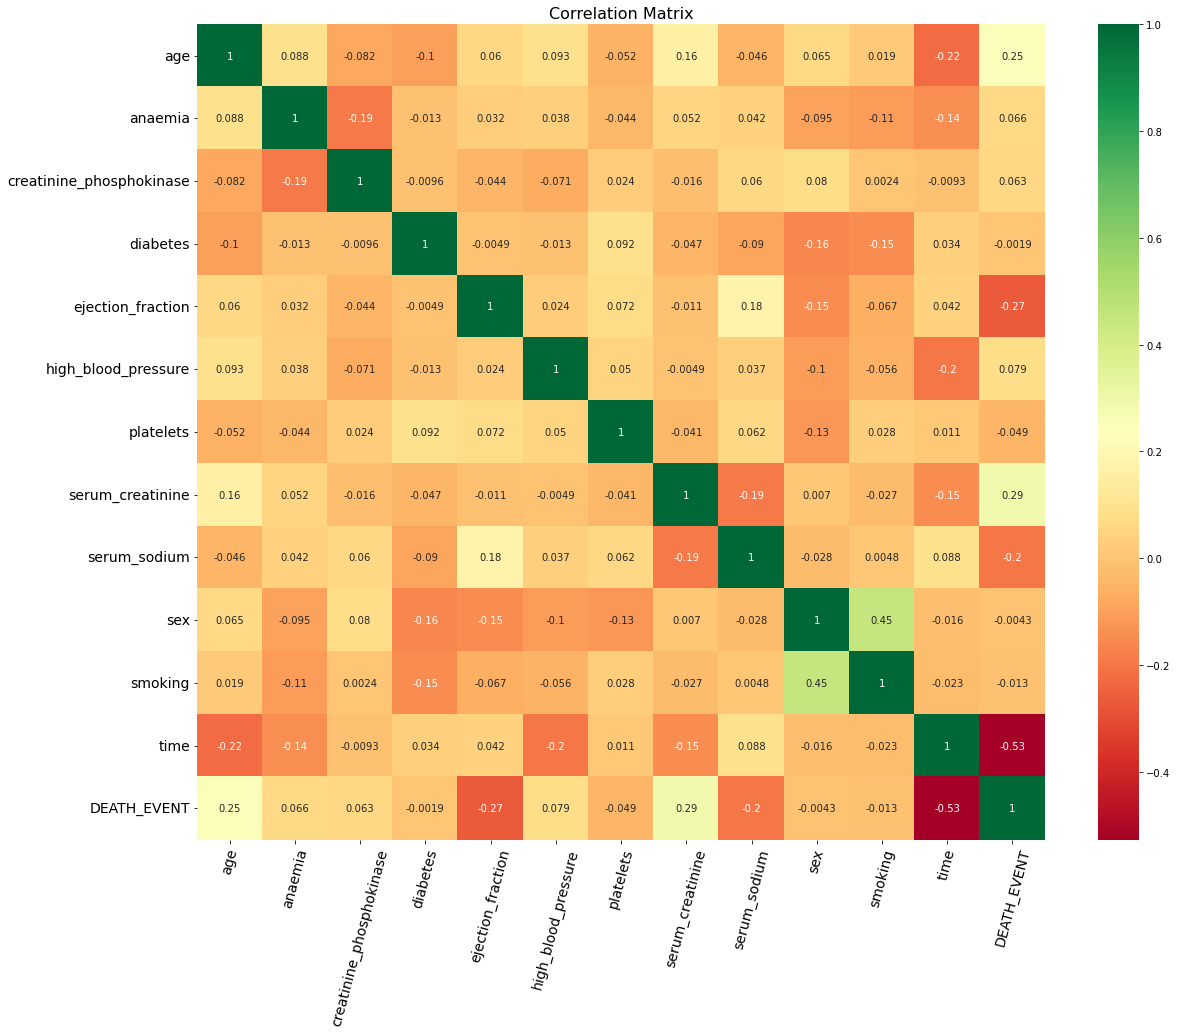

In [14]:
fig,ax = plt.subplots(figsize =(19, 15))
corrMatrix = data_df.corr()
sn.heatmap(corrMatrix, annot=True, ax = ax, cmap ="RdYlGn" )
plt.xticks( np.arange(data_df.select_dtypes(['number']).shape[1]) + 0.5 , data_df.select_dtypes(['number']).columns, fontsize=14, horizontalalignment = "center", rotation = 75)
plt.yticks( np.arange(data_df.select_dtypes(['number']).shape[1]) + 0.5, data_df.select_dtypes(['number']).columns, fontsize=14, verticalalignment = "center")
plt.title('Correlation Matrix', fontsize=16);
plt.show()

As already seen in the previously there is a strong negative correlation between the target variable and "time" but also a negetive correlation between the taget variable and "ejection_fraction". 
As we can see there is a positive correlation between "smoking" and "sex".

To prepare the dataset we will split the target variable by the predictors. 
In addition, the dataset is splitted in Train and Test and this split is stratified. Test data contains 20% of the data. 
We will standardize the predictors in such a way that the classifiers based on distance-related metrics are not conditioned by those values that are larger in absolute value.
The standardization is done after splitting the data in training and test set, by using only the means and standard deviations from training set.
Using any information coming from the test set before or during training is a potential bias in the evaluation of the performance. If we take the mean and variance of the whole dataset we'll be introducing future information into the training. To normalize the test set, we will use the normalization parameters previously obtained from the training set (mean and variance).

In [15]:
# splitting the dataset into feature vectors and the target variable
df_y = data_df["DEATH_EVENT"]
df_X = data_df.drop(["DEATH_EVENT"], axis=1)

There are other ways to rescale data like min-max normalization or mean normalization but I preferred to use standardization because we will use the pca on the predictors and therefore these must have zero mean.

$\hat{x} = \frac{x - min(x)}{max(x)-min(x)} $  **(min-max normalization)**  

$\hat{x} = \frac{x - average(x)}{max(x)-min(x)} $**(mean normalization)**  

$\hat{x} = \frac{x-\mu}{\sigma} $              **(Standardization)**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state = 42, stratify = df_y )

In [17]:
# normalize the training set (note: for decision tree/random forest it would not be needed)
X_train_normed = (X_train - X_train.mean()) / X_train.std()

In [18]:
#normalize the test set
X_test_normed = (X_test - X_train.mean()) / X_train.std()

## Principal component analysis

PCA is an unsupervised approach, since it involves only a set of features$X_{1},X_{2}, . . . , X_{d}$, and no associated response Y. 
We can have two different interpretations, from a mathematical point of view we can think to map the point in a lower dimensional space and then go back to the orignal space minimizing the recostruction error. In mathematical terms, it is expressed in the following way:  
(Considering m obsevetions in a d dimensional space)  
$\text{arg min}_{U,W}\sum_{i=1}^{m}||x_{i}- UWx_{i}||_{2}^{2}$

where W $\in R^{n,d}$, U $\in R^{d,n}$

Furthermore considering a solution of the problem (U,W) it can be proved that the columns of U are orthonormal and $W = U^{T}$ 

With Pca we can say that considering $x_{1}, \text{...} , x_{m}  \text{ observations} \in R^{d} \text{ and given } A = \sum_{i=1}^{m}x_{i}x_{i}^{T} = X^{T}X, \text{ called Scatter Matrix}$, selected the number of components n the columns of U are the eigenvectors $\mu_{1} ..., \mu_{n}$ associated to the first n eigenvalues of A, ordered by magnitude $\lambda_{1}\geq \lambda_{2} \geq...\geq\lambda_{n} \geq \lambda_{n + 1} \geq ... \geq \lambda_{d} $.  
The quantity $\sum_{i}^{m}||x_{i} - UU^{T}x_{i}|| =\lambda_{n + 1} + ... + \lambda_{d} $  is the recostruction error.

From the geometrical point of view we can say we would like to find a low-dimensional representation of the data that captures as much of the information as possible and PCA finds a low-dimensional representation of a data set that contains as much as possible of the variation. The idea is that considering n observations lives in d-dimensional space, not all of these dimensions are equally interesting.  
PCA seeks a small number of dimensions that are as interesting as possible, where the concept of interesting is measured by the amount that the observations vary along each dimension. Each of the dimensions(principal components) found by PCA is a linear combination of the d features.

The first principal component of a set of features $X_{1},X_{2}, . . . , X_{d}$ is the normalized linear combination of the features  
$Z_{1} = \phi_{11}X_{1} + \phi_{21}X_{2}+ ... + \phi_{d1}X_{d} \text{  with  } \sum_{j=1}^{d}\phi^{2}_{j1} = 1$  
that has the direction of largest variance.  
The second principal component is the linear combination of $X_{1},X_{2}, . . . , X_{d}$ that has the largest variance among all possible combination and which is uncorrelated to $Z_{1}$.
The constraint for which $Z_{2}$ must be uncurrelated to $Z_{1}$ is equivalent to constraining the direction of the two principal component to be orthogonal.
The other pricipal component are found in the same way.


In [19]:
def plot_explained_variance(var_exp,cum_var_exp, title ="The number of components needed to explain variance"):
    plt.rcParams["figure.figsize"] = (12,6)

    fig, ax = plt.subplots()
    xi = np.arange(1, len(cum_var_exp) + 1, step=1)
    y = cum_var_exp

    plt.ylim(0,110)
    cumulative = plt.plot(xi, y, marker='o', linestyle='--', color='b', label = "cumulative explained variance")

    plt.xlabel('Number of Components')
    plt.xticks(np.arange(0, len(cum_var_exp) + 1, step=1)) #change from 0-based array index to 1-based human-readable label
    plt.ylabel('Percentage of explained variance (%)')
    plt.title(title)

    plt.axhline(y= 85, color='r', linestyle='-')
    plt.text(0.5, 77, '85% cut-off threshold', color = 'red', fontsize=16)

    individual = bar_graph = plt.bar(xi, var_exp, label = "individual explained variance")
    bar_graph[0].set_color('steelblue')

    for x,y in zip(xi,var_exp):
        plt.annotate(round(y,2), # this is the text
                     (x,y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,9), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center

    ax.grid(axis='x')
    plt.legend(loc="upper left")
    plt.show()

Now the principal components are calculated using the training set

In [20]:
pca = PCA(random_state = 42)
df_X_pca = pca.fit_transform(X_train_normed)

In [21]:
tot = sum(pca.explained_variance_) # total explained variance of all principal components
var_exp = [(i / tot) * 100 for i in sorted(pca.explained_variance_, reverse=True)] # individual explained variance
cum_var_exp = np.cumsum(var_exp) # cumulative explained variance

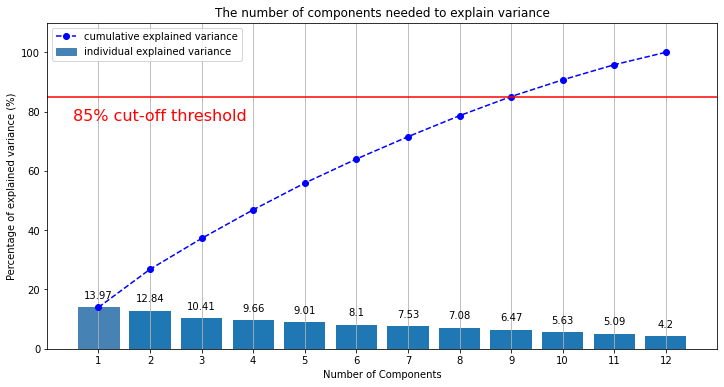

In [22]:
plot_explained_variance(var_exp,cum_var_exp)

To understand the strength of each component, we are interested in knowing the **proportion of variance explained (PVE)** by each one.
The total variance present in a data set (assuming that the
variables have been centered to have mean zero) is defined
as:  
$$\sum_{j=1}^{d}Var(X_{j}) = \sum_{j=1}^{d}\frac{1}{n}\sum_{i=1}^{n}x_{ij}^{2}$$  
and the variance explained by the mth principal
component is :  
$$Var(z_{m})= \frac{1}{n}\sum_{i=1}^{n}z_{im}^{2}$$ 
Therefore, the PVE of the mth principal component is
given by the positive quantity between 0 and 1:  
$$\frac{Var(z_{m})}{\sum_{j=1}^{d}Var(X_{j})} =\frac{\sum_{i=1}^{n} z_{im}^{2}}{\sum_{j=1}^{d}\sum_{i=1}^{n}x_{ij}^{2}}$$


I choose to reduce the dataset by using the first nine components which explain about 85% of the total variance.

In [23]:
#train reduced 
n_components = 9
X_train_reduced = np.dot(X_train_normed.values, pca.components_[:n_components,:].T)
X_train_reduced = pd.DataFrame(X_train_reduced, columns=["PC#%d" % (x + 1) for x in range(n_components)])

In [24]:
#test reduced using the components found from the training
X_test_reduced = np.dot(X_test_normed.values, pca.components_[:n_components,:].T)
X_test_reduced = pd.DataFrame(X_test_reduced, columns=["PC#%d" % (x + 1) for x in range(n_components)])

## Choice of data set for classification

In this chapter we will investigate the results obtained by Random Forest on different datasets in order to select one of them to compare different classifier on the same dataset.
The Random Forest it is used because usually with this classifier interesting results are obtained and furthermore the examined data contains outliers.
The following different versions of the dataset are investigated:
  
- full dataset
- dataset reduced by considering the first nine principal components after applying PCA  

Furthermore, we apply oversempling using Random Oversempling and the Synthetic Minority Over-sampling Technique on the training data.
The results are comparated on a test data that contains 20% of the data.
To compare the results i use f1-score as main evaluation metric. We define:

- TP = #samples for which the prediction is positive and the true label is positive
- FP = #samples for which the prediction is positive but the true label is negative
- TN = #samples for which the prediction is negative and the true label is negative
- FN = #samples for which the prediction is negative but the true label is positive  

Then we define the following:

$\text{precision} = \frac{TP}{TP + FP} $  


$\text{recall} = \frac{TP}{TP + FN}$

$\text{accuracy} = \frac{TP + TN}{TP + TN + FP + FN }$  
The accuracy is the percentage of samples classified correctly  

  
Then the f1-score is given by the following equation:
  
$F_{1}=2\,\frac{\text{precision}\, \times \,\text{recall}}{\text{precision} \, +\, \text{recall}}$

Every classifier has a set of hyperparameters, which can be tuned by training the classifier with different values for these hyperparameters and selecting the classifier with the best score.  
In order to do this i will use gridsearch and to estimate the performance of a classifier in a more reliable way, k-fold cross validation (CV) is used. In k-fold CV, the training set is divided into a k subsets called folds.  
Then the classifier is trained k times on different unions of k-1 folds and calculate its score on the subset which was not used for training. Then the final score is calculated by averaging the score of each iteration.   
In detail, let $C_1$,C$_2$,...$C_k$ be the sets of indices of the samples in each of the K folds of the dataset and let $n_k$ be the number of observations in the fold k-th.  
Then the score from the cross validation is computed as follows:

$\text{Score}_{CV(K)} = \sum_{k=1}^{K} \frac{n_k}{n}\text{Score}_k$  
To get the best estimator, I set in the Grid Search that the best estimator must have the highest value of f1-score. 
For a good trade-off between runtime and accuracy of the score i choose k=5, so the classifiers are trained on 80% of the train data in each iteration.

In [25]:
def gs_cv(clf, params, X_train, y_train, cv, ov = None):

    if ov is None:
        pipeline = Pipeline([('clf', clf)])
    else :
        pipeline = Pipeline([('os', ov), ('clf', clf)])
    gs = GridSearchCV(pipeline, params, cv=cv, n_jobs=-1, scoring='f1', return_train_score=True)
    gs.fit(X_train, y_train)
    return gs

def score_on_test_set(clfs, datasets):
    scores = []
    for c, (X_test, y_test) in zip(clfs, datasets):
        scores.append(c.score(X_test, y_test))
    return scores

def print_best_grid_search_scores_with_params(gss):
    for gs in gss:
        print(f'Mean cross-validated score of the best_estimator is {gs.best_score_}')
        print(f'The parameters of the estimator that gave the highest score are: ')
        print(gs.best_params_)
        print("----------------")

In [26]:
## taken from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html making some modification
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots( figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("F1 score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        scoring = "f1",
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes.legend(loc="best")

    return plt

In [27]:
#I reassign the variables
X_train_pca = X_train_reduced
X_test_pca = X_test_reduced
X_train = X_train_normed
X_test = X_test_normed
y_train_pca = y_train
y_test_pca = y_test

In [28]:
print("Shape of the full train dataset:", X_train.shape)
print("Shape of the transformed train dataset using the first 9 Principal Components", X_train_pca.shape)

Shape of the full train dataset: (239, 12)
Shape of the transformed train dataset using the first 9 Principal Components (239, 9)


In [29]:
sm = SMOTE(random_state = 42)
ro = RandomOverSampler(random_state = 42)
kf = StratifiedKFold(n_splits = 5)
clf_rf = RandomForestClassifier(random_state = 42)

In [30]:
RANDOM_FOREST_PARAMS = {
    'clf__max_depth': [5, 10, 15, 20],
    'clf__max_features': ["sqrt"],
    'clf__criterion': ['gini', 'entropy'],
    'clf__n_estimators': [10, 100, 500, 1000]
}

### Without additional balancing techniques

In [31]:
%%time
gs_full = gs_cv(clf_rf, RANDOM_FOREST_PARAMS, X_train, y_train, kf, ov=None)
gs_pca = gs_cv(clf_rf, RANDOM_FOREST_PARAMS, X_train_pca, y_train_pca, kf, ov=None)
gss_raw = [gs_full, gs_pca]

CPU times: user 1.7 s, sys: 182 ms, total: 1.88 s
Wall time: 2min 11s


In [32]:
test_results_raw = score_on_test_set(gss_raw, [(X_test, y_test), (X_test_pca, y_test_pca)])

### Using Random Over-sampling Technique

Random oversampling involves randomly selecting samples from the minority class, with replacement, and adding them to the training dataset.
Furthermore, i create a Pipeline of applying Random oversampling and then training the classifier, so that oversampling occurs only on training folds of cross-validation.

In [33]:
%%time
gs_full_random = gs_cv(clf_rf, RANDOM_FOREST_PARAMS, X_train, y_train, kf, ov=ro)
gs_pca_random = gs_cv(clf_rf, RANDOM_FOREST_PARAMS, X_train_pca, y_train_pca, kf, ov=ro)
gss_random = [gs_full_random, gs_pca_random]

CPU times: user 2.37 s, sys: 122 ms, total: 2.49 s
Wall time: 2min 13s


In [34]:
test_results_random = score_on_test_set(gss_random, [(X_test, y_test), (X_test_pca, y_test_pca)])

### Using Synthetic Minority Over-sampling Technique

In the Synthetic Minority Over-sampling Technique (SMOTE) algorithm the minority class is over-sampled by taking each minority class sample and introducing synthetic examples along the line segments joining any/all of the k minority class nearest neighbors. Depending upon the amount of over-sampling required, neighbors from the k nearest neighbors are randomly chosen.
Synthetic samples are generated in the following way: Take the difference between the feature vector (sample) under consideration and its nearest neighbor. Multiply this difference by a random number between 0 and 1, and add it to the feature vector under consideration.

 Furthermore, i create a Pipeline of applying Smote and then training the classifier, so that oversampling occurs only on training folds of cross-validation.

In [35]:
%%time
gs_full_smote = gs_cv(clf_rf, RANDOM_FOREST_PARAMS, X_train, y_train, kf, ov=sm)
gs_pca_smote = gs_cv(clf_rf, RANDOM_FOREST_PARAMS, X_train_pca, y_train_pca, kf, ov=sm)
gss_smote = [gs_full_smote, gs_pca_smote]

CPU times: user 2.65 s, sys: 123 ms, total: 2.77 s
Wall time: 2min 3s


In [36]:
test_results_smote = score_on_test_set(gss_smote, [(X_test, y_test),(X_test_pca, y_test_pca)])

### Comparison

Now all result of the best models are comparedon Test Data:

In [37]:
dataset_strings = ["full dataset",  "dataset with first 9 principal components"]
method_strings = ["without any balancing", "using random sampling", "using SMOTE"]

result_strings = dict()
for ms, results in zip(method_strings, [test_results_raw, test_results_random, test_results_smote]):
    for ds, res in zip(dataset_strings, results):
        string = "%.3f" % res + "     " + ds + " " + ms
        result_strings[string] = res
        
result_strings = sorted(result_strings.items(), key=lambda kv: kv[1], reverse=True)
print("F1 score  dataset and method")
for k, _ in result_strings:
    print(k)

F1 score  dataset and method
0.743     full dataset using random sampling
0.737     full dataset using SMOTE
0.667     full dataset without any balancing
0.556     dataset with first 9 principal components using random sampling
0.529     dataset with first 9 principal components using SMOTE
0.516     dataset with first 9 principal components without any balancing


The best score is obtained with the full dataset using Random oversampling , this result can be due to the basic implementation of smote that doesn't work with categorical values.

In [38]:
X_res, y_res = sm.fit_resample(X_train, y_train)
print(f'unique values in train for Anaemia -> {X_train["anaemia"].unique()}')
print(f'unique values in train resampled for Anaemia -> {X_res["anaemia"].unique()}')

unique values in train for Anaemia -> [ 1.1083696  -0.89845111]
unique values in train resampled for Anaemia -> [ 1.1083696  -0.89845111 -0.1098393  -0.86707165  0.70932854  0.96046867
  0.40814375  0.28817753  0.33990401 -0.65344248 -0.18342523 -0.35233048
  0.56770735  0.81118568]


As we can see using the basic smote implementation there are some problems with categorical values.
This problem is due to the fact that Smote generates synthetic data by taking the difference between the feature vector (sample) under consideration and its closest neighbor and this is a problem for categorical values because instead of considering an existing value Smote generates a new value which is a cross between the sample (under consideration) and its neighbor.
To solve the problem we can use Smote-NC. Unlike SMOTE, SMOTE-NC is used for datasets containing numeric and categorical characteristics. However, it is not designed to work only with categorical features.

In [39]:
sm_nc = SMOTENC(random_state=42, categorical_features=[1,3,5,9,10])
X_res, y_res = sm_nc.fit_resample(X_train, y_train)
print(f'unique values in train for Anaemia -> {X_train["anaemia"].unique()}')
print(f'unique values in train resampled for Anaemia -> {X_res["anaemia"].unique()}')

unique values in train for Anaemia -> [ 1.1083696  -0.89845111]
unique values in train resampled for Anaemia -> [ 1.1083696  -0.89845111]


### Final comparison

So let's make a final comparison between SMOTE-NC and Random Oversampling on full dataset.

In [40]:
gs_full_smote_nc = gs_cv(clf_rf, RANDOM_FOREST_PARAMS, X_train, y_train, kf, ov=sm_nc)
gss_oversampling = [gs_full_random, gs_full_smote_nc ]
test_results_oversampling = score_on_test_set(gss_oversampling, [(X_test, y_test),(X_test, y_test)])

In [41]:
test_results_oversampling
result_strings = dict()
methods = ["using random oversampling", "using SMOTE-NC"]
ds = "full dataset"
for i, ms in enumerate(methods):
    string = "%.3f" % test_results_oversampling[i] + "     " + ds + " " + ms
    result_strings[string] = res
        
result_strings = sorted(result_strings.items(), key=lambda kv: kv[1], reverse=True)
print("F1 score  dataset and method")
for k, _ in result_strings:
    print(k)

F1 score  dataset and method
0.743     full dataset using random oversampling
0.667     full dataset using SMOTE-NC


From this we can deduce that basic implementation of Smote perform better than Smote-NC. Random oversampling has better performance than SMOTE. This could be due to the fact that randomly sampled samples are representative of the problem. So for the next section we will use the dataset that got the best score to make a comparison between different classification models.

## Classification

In this chapter, other classifiers will be trained using the Full Dataset with Random oversampling as training data. The models will be obtained through Grid Serach as for the Random Forest

In [42]:
def plot_feature_importances(importances, feature_names, title):
    forest_importances = pd.Series(importances, index=feature_names)
    fig, ax = plt.subplots(figsize = (10, 5))
    forest_importances.sort_values(inplace = True, ascending=False)
    forest_importances.plot.bar( ax=ax)
    ax.set_title(title)
    ax.set_ylabel("Feature importance")
    fig.tight_layout()

### K-Nearest Neighbors

In theory we would always like to predict qualitative responses using the Bayes classifier. But for real data, we do not know the conditional distribution
of Y given X, and so computing the Bayes classifier is impossible.  
Therefore, the Bayes classifier serves as an unattainable gold standard against which to compare other methods. Many approaches attempt to estimate the conditional distribution of Y given X, and then classify a given observation to the class with highest estimated probability. One such
method is the K-nearest neighbors (KNN) classifier. Given a positive integer K and a test observation $x_0$ , the KNN classifier first identifies the neighbors
K points in the training data that are closest to $x_0$ , represented by $N_0$ .
It then estimates the conditional probability for class j as the fraction of
points in $N_0$ whose response values equal j:

$\text{PR}(Y = j | X = x_0)= \frac{1}{K}\sum_{i \in N_0}{I(y_i = j)}$

Finally, KNN applies Bayes rule and classifies the test observation $x_0$ to the class with the largest probability.

The hyperparameters of KNN include the following ones, which can be passed to the KNeighborsClassifier of sklearn.neighbors:

- n_neighbors: corresponds to K, the number of nearest neighbors considered for the prediction (default=5)
- weights:
  - if uniform, then all neighbors have the same weight for the voting (default)
  - if distance, then the votes of the neighbors are weighted by the inverse of the distance for the voting
- p: the power parameter for the Minkowski metric (default=2)

In [43]:
KNN_PARAMS = {
    'clf__n_neighbors': [5, 15, 25],
    'clf__weights': ['uniform', 'distance'],
    'clf__p': [1, 2]
}

In [44]:
clf_knn = KNeighborsClassifier()
gs_knn = gs_cv(clf_knn, KNN_PARAMS, X_train, y_train, kf, ov=ro)

In [45]:
print_best_grid_search_scores_with_params([gs_knn])

Mean cross-validated score of the best_estimator is 0.5981122900088417
The parameters of the estimator that gave the highest score are: 
{'clf__n_neighbors': 25, 'clf__p': 1, 'clf__weights': 'uniform'}
----------------


#### Confusion Matrix

Now we can see the confusion matrix from which we can calculate accuracy, precision, recall and f1-score

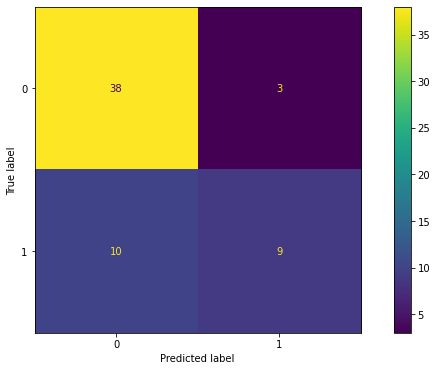

In [46]:
plot_confusion_matrix(gs_knn, X_test, y_test)

In [47]:
y_pred = gs_knn.predict(X_test)
row = []
row.append(accuracy_score(y_test, y_pred))
row.append(precision_score(y_test, y_pred))
row.append(recall_score(y_test, y_pred))
row.append(f1_score(y_test, y_pred))
row = ["%.3f" % r for r in row]
names = ["Accuracy", "Precision", "Recall", "F1_Score"]
for val, name in zip (row, names):
    print(f'{name} : {val}')

Accuracy : 0.783
Precision : 0.750
Recall : 0.474
F1_Score : 0.581


As we can see despite we got the best estimator according to F1-Score to seek a balance between Precision and Recall, the value of recall is too low and the values of accuracy and Precision are high. This means that this model tends to assign the negative label (No death event) to which we are not interested.

#### Learning Curve

Now we can see the learning curve of KNN usinig the best estimator of the grid search.

<module 'matplotlib.pyplot' from '/Users/AndreaVara/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

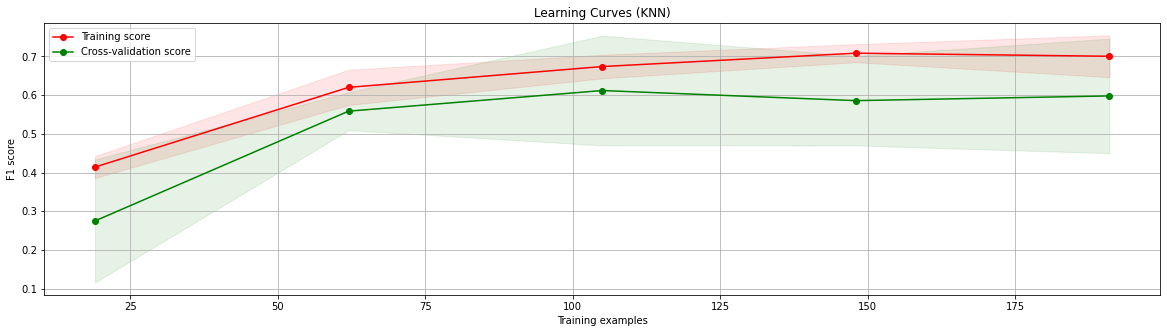

In [48]:
title = "Learning Curves (KNN)"
pipeline = Pipeline([('os', ro), ('clf', gs_knn.best_estimator_)])
plot_learning_curve(pipeline, title, X_train, y_train, cv=5, n_jobs=-1)

As we can see the  score grows rapidly in the first phase (first 65 examples) both for the train and for the validation. Later we can see that the validation score stabilizes at 0.6, instead for training it slowly grows until it stabilizes at 0.7.
In general we can say that f1-score increases with increasing samples for both training and validation.

### Logistic regression

Logistic regression, despite its name, is a linear model for classification rather than regression. The idea is to introduce a nonlinear function σ is the logistic sigmoid function
and is defined in the following way:

$ \sigma(x)= \frac{1}{1+e^{-x}} $

It is called “sigmoid” because it has the shape of an “s” and squashes the values in the range (0, 1).

Defining $x_i$ as the n-dimensional feature vector of a given sample and $\text{β0,β=(β1,...,βn)}^{T}$ as the model parameters. Then the logistic regression model is defined as:

$P(Y=1 \vert x_i)= \frac{\text{exp}(\beta_{0} + x_i^T\boldsymbol{\beta} )}{1+\text{exp}(\beta_{0} + x_i^T\boldsymbol{\beta} )} = \frac{1}{1+\text{exp}(-(\beta_{0} + x_i^T\boldsymbol{\beta} ))} = \sigma (\beta_{0} + x_i^T\boldsymbol{\beta})$

So with logistic regression we predict the probability of the positive class.

In [49]:
LOGISTIC_REGRESSION_PARAMS = {
    'clf__solver': ['liblinear'],## the problem of ottimization is resolved by CD(Coordinate descent). Coordinate descent updates one parameter at a time, while gradient descent attempts to update all parameters at once
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l2', 'l1']
}

The hyperparameters of a logistic regression include the following ones, which can be passed to the LogisticRegression of sklearn.linear_model:
- penalty: the norm used for penalization (default='l2')
- C: the inverse of the regularization strength (default=1.0)

In [50]:
clf_lr = LogisticRegression(random_state=42)
gs_lr = gs_cv(clf_lr, LOGISTIC_REGRESSION_PARAMS, X_train, y_train, kf, ov=ro)

In [51]:
print_best_grid_search_scores_with_params([gs_lr])

Mean cross-validated score of the best_estimator is 0.7109925642353486
The parameters of the estimator that gave the highest score are: 
{'clf__C': 1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
----------------


#### Confusion Matrix

Now we can see the confusion matrix from which we can calculate accuracy, precision, recall and f1-score

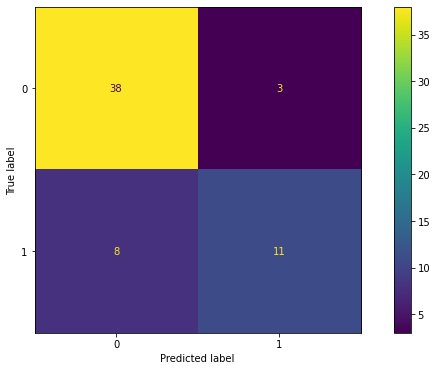

In [52]:
plot_confusion_matrix(gs_lr, X_test, y_test)

In [53]:
y_pred = gs_lr.predict(X_test)
row = []
row.append(accuracy_score(y_test, y_pred))
row.append(precision_score(y_test, y_pred))
row.append(recall_score(y_test, y_pred))
row.append(f1_score(y_test, y_pred))
row = ["%.3f" % r for r in row]
names = ["Accuracy", "Precision", "Recall", "F1_Score"]
for val, name in zip (row, names):
    print(f'{name} : {val}')

Accuracy : 0.817
Precision : 0.786
Recall : 0.579
F1_Score : 0.667


As we can see this model has high precision and accuracy values while the recall value is not too bad.

#### Learning Curve

Now we can see the learning curve of Logistic regression of the best estimator of the grid search.

<module 'matplotlib.pyplot' from '/Users/AndreaVara/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

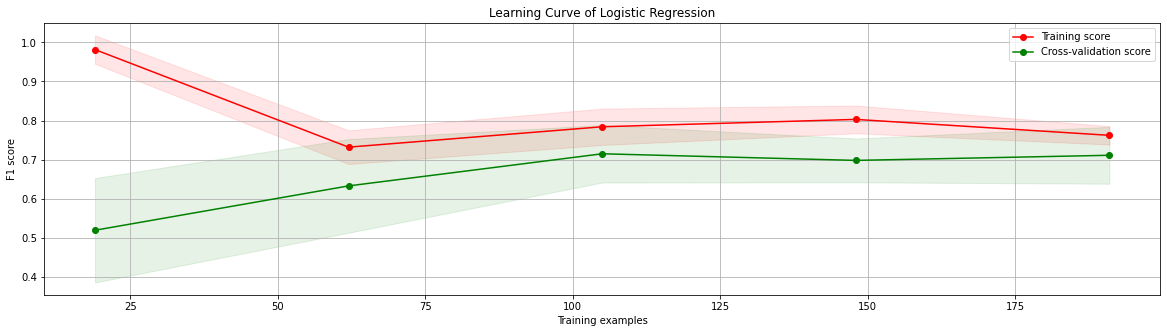

In [54]:
pipeline = Pipeline([('os', ro), ('clf', gs_lr.best_estimator_)])
plot_learning_curve(pipeline, "Learning Curve of Logistic Regression", X_train, y_train, cv=5)

Initially the model make overfitting because we have a big gap between training and test scores.
As we can see on Training Score decreases rapidly (first 65 samples) until it stabilizes at 0.8.The validation-score slowly grows until it stabilizes at 0.7.

### Support-Vector Machine

Suppose that we have a n×p data matrix X that consists of n training
observations in p-dimensional space,

Suppose that it is possible to construct a hyperplane that separates the hyperplane
training observations perfectly according to their class labels.  
Then a separating hyperplane has the property that:

- $\beta_0 + \beta_{1}x_{i1} + \beta_{2}x_{i2} + . . . + \beta_{p}x_{ip} > 0 \text{    if   } y_{i} = 1$

- $\beta_0 + \beta_{1}x_{i1} + \beta_{2}x_{i2} + . . . + \beta_{p}x_{ip} < 0 \text{    if   } y_{i} = -1$

Equivalently, a separating hyperplane has the property that:

$y_{i}(\beta_0 + \beta_{1}x_{i1} + \beta_{2}x_{i2} + . . . + \beta_{p}x_{ip}) > 0 $

for all i = 1, . . . , n.

If a separating hyperplane exists, we can use it to construct a very natural classifier: a test observation is assigned a class depending on which side of
the hyperplane it is located.

We classify the test observation $x^{*}$
based on the sign of $f(x^{*}) = \beta_{0}+\beta_{1}x^{*}_{1} +\beta_{2}x^{*}_{2} +. . .+\beta_{p}x^{*}_{p}$. If $f(x^{*})$ is positive,
then we assign the test observation to class 1, and if $f(x^{*})$ is negative, then
we assign it to class −1. We can also make use of the magnitude of $f(x^{*})$.   
If $f(x^{*})$ is far from zero, then this means that $x^{*}$ lies far from the hyperplane,
and so we can be confident about our class assignment for $x^{*}$.  
On the other hand, if $f(x^{*})$ is close to zero, then $x^{*}$ is located near the hyperplane, and so
we are less certain about the class assignment for $x^{*}$. A classifier that is based on a separating hyperplane leads to a linear decision boundary.

In general, if our data can be perfectly separated using a hyperplane, then
there will in fact exist an infinite number of such hyperplanes. This is
because a given separating hyperplane can usually be shifted a tiny bit up or
down, or rotated, without coming into contact with any of the observations.

- A natural choice is the maximal margin hyperplane, which is the separating hyperplane that is farthest from the training observations

The maximal margin hyperplane is the solution to the optimization problem: 

$$ maximize_{\beta_{0},\beta_{1}, ..., \beta{p}} M$$ 
$$\text{subject to} \sum_{j =1}^{p} \beta_{J}^2 = 1, $$
$$ y_{i}(\beta_0 + \beta_{1}x_{i1} + \beta_{2}x_{i2} + . . . + \beta_{p}x_{ip}) \ge M $$

for all i = 1, . . . , n.  
Where M is the margin of the hyperplane

The points that lie on the margin are called support vectors, since they are vectors in p-dimensional space and they “support” the maximal margin hyperplane in the sense 
that if these points were moved slightly then the maximal margin hyperplan ewould move as well. The maximal margin hyperplane
depends directly on the support vectors, but not on the other observations.

The maximal margin classifier is a very natural way to perform classification,
if a separating hyperplane exists. However in many cases no separating hyperplane exists, and so there is no maximal
margin classifier.

- However, we can extend the concept of a separating hyperplane in order to develop a hyperplane that almost separates the classes, using a so-called soft margin.

The generalization of the maximal margin classifier to the non-separable case is known as the support vector classifier.

Rather than seeking the largest possible margin so that
every observation is not only on the correct side of the hyperplane but
also on the correct side of the margin, we instead allow some observations
to be on the incorrect side of the margin, or even the incorrect side of
the hyperplane.(The margin is soft because it can be violated by some
of the training observations.). Observations
that lie directly on the margin, or on the wrong side of the margin for
their class, are known as support vectors. These observations do affect the
support vector classifier.

The solution to the optimization problem is: 

$$ maximize_{\beta_{0},\beta_{1}, ..., \beta{p}, \epsilon_{1},..., \epsilon_{n} } M$$
$$\text{subject to} \sum_{j =1}^{p} \beta_{J}^2 = 1, $$
$$ y_{i}(\beta_0 + \beta_{1}x_{i1} + \beta_{2}x_{i2} + . . . + \beta_{p}x_{ip}) \ge M(1 - \epsilon_{i}), $$
$$\epsilon_{i} \ge 0, \sum_{i=1}^{n}\epsilon_{i}\le C$$

Where $\epsilon_{1}$, . . . , $\epsilon_{n}$ are slack variables, the slack variable $\epsilon_{i}$ tells us where the ith observation is located,
relative to the hyperplane and relative to the margin. If $\epsilon_{i}$ = 0 then the ith
observation is on the correct side of the margin.
If $\epsilon_{i}$ > 0 then the ith observation is on the wrong side of the margin, and
we say that the ith observation has violated the margin. If $\epsilon_{i}$ > 1 then it
is on the wrong side of the hyperplane.
C is a nonnegative tuning parameter that bounds
the sum of the $\epsilon_{i}$’s, and so it determines the number and severity of the violations
to the margin (and to the hyperplane) that we will tolerate.
If C = 0 then $\epsilon_{1}$ = . . . = $\epsilon_{n}$ = 0, so we return to the maximal margin hyperplane optimization
problem.

The support vector classifier is a natural approach for classification in the
two-class setting, if the boundary between the two classes is linear. However,
in practice we are sometimes faced with non-linear class boundaries.

- we could address the problem of possibly non-linear boundaries between classes  by enlarging the feature space 

we can map the samples x into a feature space of higher dimensions: x⟶ϕ(x) in which the classes can be linearly separated. This results in a non-linear decision boundary in the original dimensions.
It is not hard to see that there are many possible ways to enlarge the feature space, and that unless we are careful, we could end up with a huge number of features. 
Then computations would become unmanageable.
The support vector machine (SVM) is an extension of the support vector machine classifier that results from enlarging the feature space in a specific way, using kernels.
The advantage of using a kernel rather than simply enlarging the feature space using functions is computational, and it amounts to the fact that using kernels,
one need only compute $K(x_i, \hat{x}_i)$ for all distinct pairs $i$, $\hat{i}$. This can be
done without explicitly working in the enlarged feature space.

we define a so-called kernel function:

$K({\bf x}_1,{\bf x}_2)=<\phi({\bf x}_1),\phi({\bf x}_2)>$

In the gridsearch we consider the following two kernels:

- linear Kernel $K({\bf x}_1,{\bf x}_2) = <{\bf x}_1 , {\bf x}_2>$
- Rbf $K({\bf x}_1,{\bf x}_2) = exp(-\gamma({\Vert {\bf x}_1 - {\bf x}_2 \Vert}^2))$

The hyperparameters of a SVM include the following ones, which can be passed to the SVC of sklearn.svm:

- C: the inverse of the regularization strength (default=1.0) (with high values we tend to have a hard margin)
- kernel: the kernel used (default='rbf')
- gamma: Kernel coefficient for ‘rbf’. Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.

In [55]:
SVM_PARAMS = [
{
    'clf__kernel': ['linear'],
    'clf__C': [0.1, 1, 10],
}, 
{
    'clf__kernel': ['rbf'],
    'clf__C': [ 0.1, 1, 10],
    'clf__gamma': [0.01,0.1,1],
}]

In [56]:
clf_svm = svm.SVC(random_state=42, probability=True)
gs_svm = gs_cv(clf_svm, SVM_PARAMS, X_train, y_train, kf, ov=ro)

In [57]:
print_best_grid_search_scores_with_params([gs_svm])

Mean cross-validated score of the best_estimator is 0.7120602745602745
The parameters of the estimator that gave the highest score are: 
{'clf__C': 1, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}
----------------


#### Confusion Matrix

Now we can see the confusion matrix from which we can calculate accuracy, precision, recall and f1-score

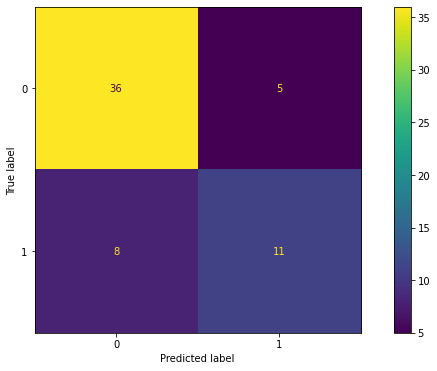

In [58]:
plot_confusion_matrix(gs_svm, X_test, y_test)

In [59]:
y_pred = gs_svm.predict(X_test)
row = []
row.append(accuracy_score(y_test, y_pred))
row.append(precision_score(y_test, y_pred))
row.append(recall_score(y_test, y_pred))
row.append(f1_score(y_test, y_pred))
row = ["%.3f" % r for r in row]
names = ["Accuracy", "Precision", "Recall", "F1_Score"]
for val, name in zip (row, names):
    print(f'{name} : {val}')

Accuracy : 0.783
Precision : 0.688
Recall : 0.579
F1_Score : 0.629


As we can see this model has high accurancy and values of Precision and Recall not very high.

#### Learning Curve

Now we can see the learning curve of SVM usinig the best estimator of the grid search.

<module 'matplotlib.pyplot' from '/Users/AndreaVara/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

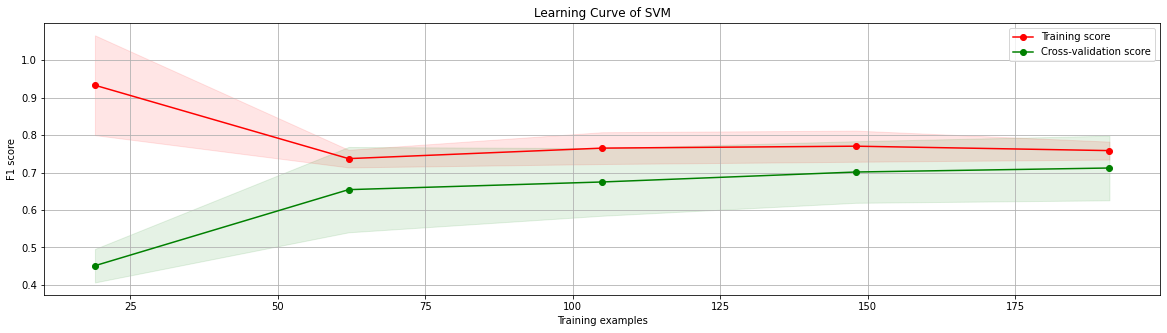

In [60]:
pipeline = Pipeline([('os', ro), ('clf' ,gs_svm.best_estimator_)])
plot_learning_curve(pipeline, "Learning Curve of SVM", X_train, y_train, cv=5)

Initially the model make overfitting because we have a big gap between training and test scores.
As we can see, the training score decreases rapidly (first 65 samples) until it stabilizes at 0.75. The score grows rapidly until it stabilizes at 0.7.

### Decision Tree

Decision Tree is used to solve regression and classification task. These involve stratifying or segmenting the predictor space
into a number of simple regions. We call it Decision Tree because the predicted value is obtained by scrolling the nodes of the tree.
Each node of tree represent a feature and the branches coming from a node represent the values of the feature, we use theese values to split the predictor space.
So the prediction is obtained by following a specific path in the tree, the path starts by a root node to reach a leaf, the leaves represent specific regions in wich all the samples that end up in that particular region will be predicted with a certain value that will correspond to the average of the class label in the case of regression, or to the most present class among the training data present in that region in the case of classification.

The model is obtained following a top-down, greedy approach that
is known as recursive binary splitting, because the theoretical minimum of function exists but it is NP-hard to determine it.
- The approach is top-down because it begins at the top of
  the tree and then successively splits the predictor space;
  each split is indicated via two new branches further down
  on the tree.
- It is greedy because at each step of the tree-building
  process, the best split is made at that particular step,
  rather than looking ahead and picking a split that will lead
  to a better tree in some future step.


The binary split process continues until a
stopping criterion is reached; for instance, we may continue until we reach a max depth of tree or we may continue
until no region contains more than five observations.

For classification tree the "best" split different metrics can be used, which generally measure the homogeneity of the target variable within the subsets. For this analysis we use Gini-Index and Cross-Entropy

**Gini Index:**  
    $G= \sum_{k=1}^{K}\hat{p}_{mk}(1- \hat{p}_{mk}) = 1 - \sum_{k=1}^{K}\hat{p}_{mk}^{2}$
    
$\text{where m is a region and k is a class}$

Gini index is referred to as a measure of
node purity, a small value indicates that a node contains
predominantly observations from a single class this implies lower impurity degree.
High value indicates that observations are equally distributed among all classes, implyng higher impurity degree

**Cross Entropy**  
$D = -\sum_{k=1}^{K} \hat{p}_{mk}\log{\hat{p}_{mk}}$

High value  indicates that observations are equally distributed among all classes, implying higher impurity degree.
Small value indicates that a node contains predominantly observations from a single clas, implying lower impurity degree.

Entropy based computations are similar to GINI index computations

The hyperparameters of a decision tree include the following ones, which can be passed to the DecisionTreeClassifier of sklearn.tree:

- criterion: the criterion which decides the feature and the value at the split (default='gini')
- max_depth: the maximum depth of each tree (default=None)
- min_samples_split: the minimum number of samples in a node to be considered for further splitting (default=2)
- max_features: the number of features which are considered for a split (default='sqrt')

In [61]:
DECISION_TREE_PARAMS = {
    'clf__max_depth': [5,10,15,20],
    'clf__max_features': ["sqrt"],
    'clf__criterion': ['gini', 'entropy'],
    'clf__min_samples_split': [5, 10, 15],
}

In [62]:
clf_dt = DecisionTreeClassifier(random_state=42)
gs_dt = gs_cv(clf_dt, DECISION_TREE_PARAMS, X_train, y_train, kf, ov=ro)

In [63]:
print_best_grid_search_scores_with_params([gs_dt])

Mean cross-validated score of the best_estimator is 0.6796568627450981
The parameters of the estimator that gave the highest score are: 
{'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 15}
----------------


#### Confusion Matrix

Now we can see the confusion matrix from which we can calculate accuracy, precision, recall and f1-score

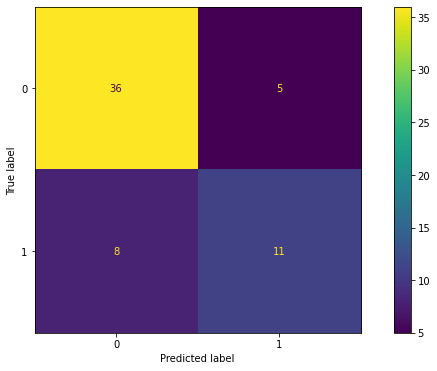

In [64]:
plot_confusion_matrix(gs_dt, X_test, y_test)

In [65]:
y_pred = gs_dt.predict(X_test)
row = []
row.append(accuracy_score(y_test, y_pred))
row.append(precision_score(y_test, y_pred))
row.append(recall_score(y_test, y_pred))
row.append(f1_score(y_test, y_pred))
row = ["%.3f" % r for r in row]
names = ["Accuracy", "Precision", "Recall", "F1_Score"]
for val, name in zip (row, names):
    print(f'{name} : {val}')

Accuracy : 0.783
Precision : 0.688
Recall : 0.579
F1_Score : 0.629


As we can see also this model has high accurancy and values of Precision and Recall not very high.

#### Feature importance

Now we can see the feature importance releted to Decision tree.

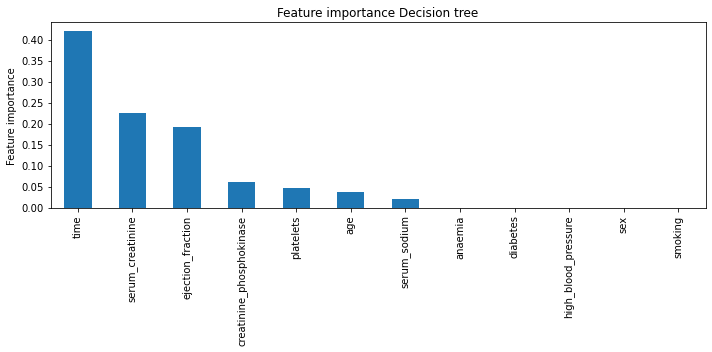

In [66]:
feature_importance_dt =  gs_dt.best_estimator_.named_steps['clf'].feature_importances_
feature_names = X_train.columns
plot_feature_importances(feature_importance_dt, feature_names, "Feature importance Decision tree")

We can see that the most important features for the Decision Tree are  *time, serum_creatinine, ejection_fracion*. We had already noticed a relationship between these features and the target variable in *Data exploration* chapter when we saw the *Feature-Class Relationships*. it can also be noted that the categorical features have no importance in decision tree.

#### Learning Curve

Now we can see the learning curve of Decision Tree usinig the best estimator of the grid search.

<module 'matplotlib.pyplot' from '/Users/AndreaVara/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

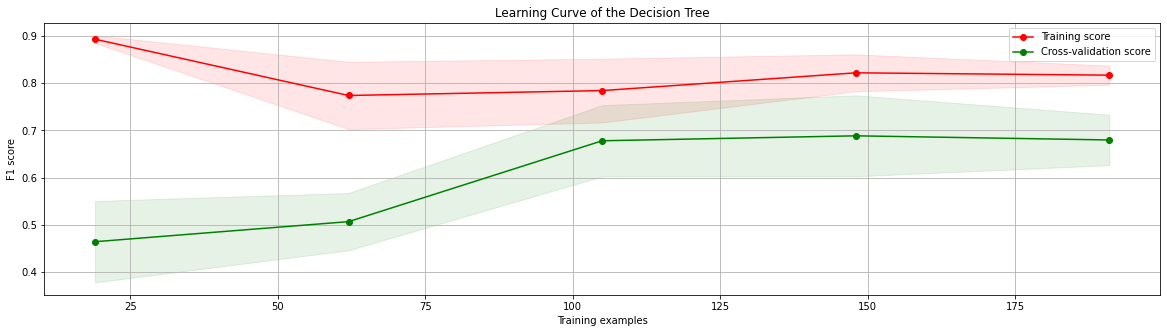

In [67]:
pipeline = Pipeline([('os', ro), ('clf' ,gs_dt.best_estimator_)])
plot_learning_curve(pipeline, "Learning Curve of the Decision Tree", X_train, y_train, cv=5)

Initially the model make overfitting because we have a big gap between training and test scores. As we can see, the training score slowly decreases (first sample 65) until it stabilizes at 8.0. Instead the  validation score slowly grows to 0.5 (first 65 samples) and then rapidly grows to stabilize at 0.7.

### Random Forest

A random forest is an ensemble model. Random forests provide an improvement over bagged trees by way of a random
small tweak that decorrelates the trees. This
reduces the variance when we average the trees. 
As in bagging, we build a number forest
of decision trees on bootstrapped training samples. But when building these
decision trees, each time a split in a tree is considered, a random sample of
m predictors is chosen as split candidates from the full set of p predictors.
The split is allowed to use only one of those m predictors. A fresh sample of
m predictors is taken at each split, and typically we choose m ≈ √p—that
is, the number of predictors considered at each split is approximately equal
to the square root of the total number of predictors. Assuming
that there is one very strong predictor in the data set, then if wee use a collection of bagged
trees, most or all of the trees will use this strong predictor in the top split.
Consequently, all of the bagged trees will look quite similar to each other.
Hence the predictions from the bagged trees will be highly correlated. 
In particular, this means that bagging will not lead to a substantial
reduction in variance over a single tree in this setting.
Random forests overcome this problem by forcing each split to consider
only a subset of the predictors. We can think of this process as decorrelating
the trees, thereby making the average of the resulting trees less variable
and hence more reliable.
The main difference between bagging and random forests is the choice
of predictor subset size m. For instance, if a random forest is built using
m = p, then this amounts simply to bagging.
However the model cannot be interpreted as the decision tree because the prediction is given by the voting process

The hyperparameters of a random forest include the following ones, which can be passed to the RandomForestClassifier of sklearn.ensemble:

- n_estimators: the number of trees
- criterion: the criterion which decides the feature and the value at the split (default='gini')
- max_depth: the maximum depth of each tree (default=None)
- max_features: the number of features which are considered for a split (default='sqrt')

In [68]:
clf_rf = RandomForestClassifier(random_state=42)
gs_rf = gs_cv(clf_rf, RANDOM_FOREST_PARAMS, X_train, y_train, kf, ov=ro)

In [69]:
print_best_grid_search_scores_with_params([gs_rf])

Mean cross-validated score of the best_estimator is 0.7829389873744712
The parameters of the estimator that gave the highest score are: 
{'clf__criterion': 'gini', 'clf__max_depth': 5, 'clf__max_features': 'sqrt', 'clf__n_estimators': 500}
----------------


#### Confusion Matrix

Now we can see the confusion matrix from which we can calculate accuracy, precision, recall and f1-score.

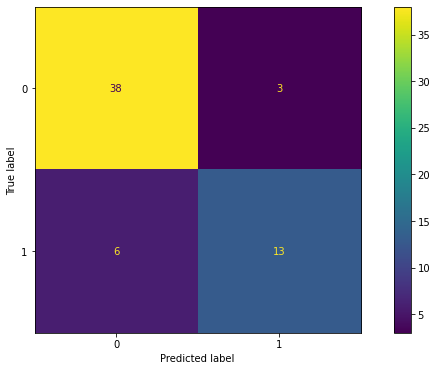

In [70]:
plot_confusion_matrix(gs_rf, X_test, y_test)

In [71]:
y_pred = gs_rf.predict(X_test)
row = []
row.append(accuracy_score(y_test, y_pred))
row.append(precision_score(y_test, y_pred))
row.append(recall_score(y_test, y_pred))
row.append(f1_score(y_test, y_pred))
row = ["%.3f" % r for r in row]
names = ["Accuracy", "Precision", "Recall", "F1_Score"]
for val, name in zip (row, names):
    print(f'{name} : {val}')

Accuracy : 0.850
Precision : 0.812
Recall : 0.684
F1_Score : 0.743


As we can see this model has very high values for Accurancy, Precision and Recall. This means that we have found a great model for working on these types of data.

#### Feature Importance

In the Random Forest the feature importances are obtained by computing it for all trees and taking the average.

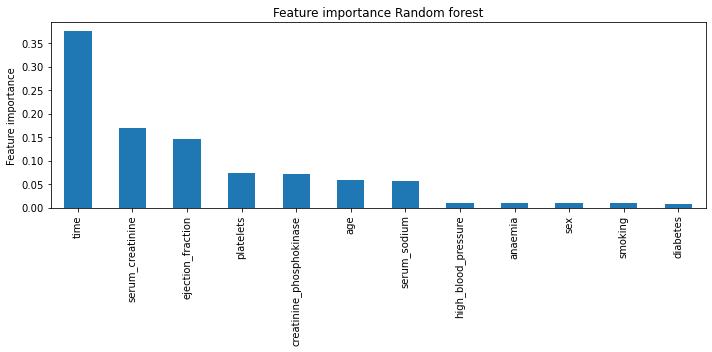

In [72]:
feature_importance_rf =  gs_rf.best_estimator_.named_steps['clf'].feature_importances_
feature_names = X_train.columns
plot_feature_importances(feature_importance_rf, feature_names, "Feature importance Random forest")

The most important feature for the Random Forest are  *time, serum_creatinine, ejection_fracion* like in Decision Tree. Unlike Decision tree it can be noticed that categorical features are considered although they are less important than the others.

#### Learning Curve

Now we can see the learning curve of Random Forest usinig the best estimator of the grid search.

<module 'matplotlib.pyplot' from '/Users/AndreaVara/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

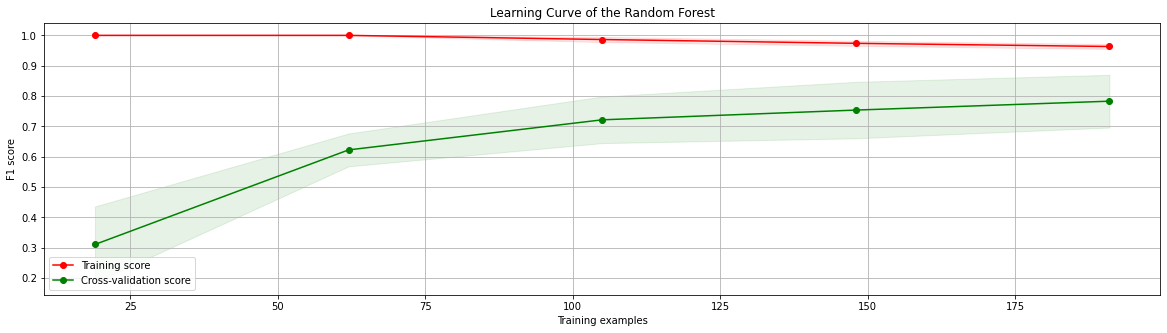

In [73]:
pipeline = Pipeline([('os', ro), ('clf' ,gs_rf.best_estimator_)])
plot_learning_curve(pipeline, "Learning Curve of the Random Forest", X_train, y_train, cv=5)

Initially the model make overfitting because we have a big gap between training and test scores.
As we can see the test score of the Random Forest constantly increases with increasing samples until it reaches  0.8.  The training score is costant and is very high.

## Results 

In [74]:
def plot_ROC_curves(classifiers, X_test, y_test):
    # Define a result table as a DataFrame
    result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
    aucs = []
    # Train the models and record the results
    for cls in classifiers:
        yproba = cls.predict_proba(X_test)[::,1]
        
        fpr, tpr, _ = roc_curve(y_test,  yproba)
        auc = roc_auc_score(y_test, yproba)
        aucs.append(auc)
        result_table = result_table.append({'classifiers':cls.estimator.steps[1][1].__class__.__name__,
                                            'fpr':fpr, 
                                            'tpr':tpr, 
                                            'auc':auc}, ignore_index=True)

    # Set name of the classifiers as index labels
    result_table.set_index('classifiers', inplace=True)
    fig = plt.figure(figsize=(8,6))

    for i in result_table.index:
        plt.plot(result_table.loc[i]['fpr'], 
                 result_table.loc[i]['tpr'], 
                 label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

    plt.plot([0,1], [0,1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("Flase Positive Rate", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)

    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size':13}, loc='lower right')

    plt.show()
    return aucs

Now let's compare all the classification models. To make this caparison we have to add a new measure *Area Under The Receiver Operating Characteristic Curve (AUC)*. AUC is the measure of the ability of a classifier to distinguish between classes.

### Area Under the Receiver Operating Characteristic curve (AUC)

To introduce this concept, we define the following two metrics:

- True positive rate (TPR): this is the same as the recall: $FPR =\frac{TP}{FN+TP}$  
  It describe how good the model is at predicting the positive class when the actual outcome is positive.
- False positive rate (FPR): $FPR=\frac{FP}{TN+FP}$  
  this corresponds to the proportion of negative data points that are mistakenly considered as positive, with respect to all negative data points.  
  
To plot the Receiver Operating Characteristic (ROC) curve some tresholds are set, where all values equal or greater than the threshold are mapped to one class and all other values are mapped to another class, then the TPR(y-axis) and FPR(x-axis) are computed. 
Then the area under the curve is computed.

The following plot shows the ROC curves of the classifiers trained in the previous chapters:

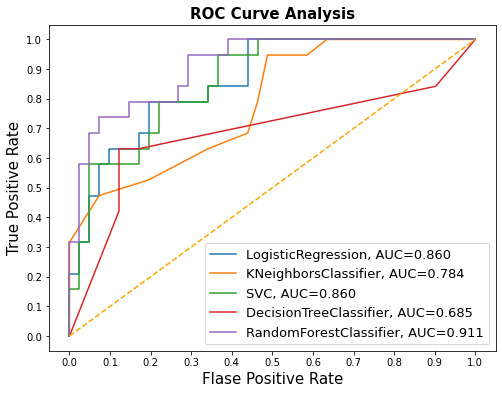

In [75]:
classifiers = [gs_lr, gs_knn, gs_svm, gs_dt, gs_rf]
auc_scores = plot_ROC_curves(classifiers, X_test, y_test)

As we can see the best result are obtained by Random Forest followed by Logistic Regression, SVM, KNN and Decision Tree.

### Summary

Finally, to summarize the scores achieved by all classifiers, we can see a table showing Accuracy, Precision, Recall, F1 and Auc.

In [76]:
accs = []
recalls = []
precision = []
results_table = pd.DataFrame(columns=["accuracy", "precision", "recall", "f1", "auc"])
for (i, clf), auc in zip(enumerate(classifiers), auc_scores):
    y_pred = clf.predict(X_test)
    row = []
    row.append(accuracy_score(y_test, y_pred))
    row.append(precision_score(y_test, y_pred))
    row.append(recall_score(y_test, y_pred))
    row.append(f1_score(y_test, y_pred))
    row.append(auc)
    row = ["%.3f" % r for r in row]
    results_table.loc[clf.estimator.steps[1][1].__class__.__name__] = row

In [77]:
results_table

,accuracy,precision,recall,f1,auc
LogisticRegression,0.817,0.786,0.579,0.667,0.860
KNeighborsClassifier,0.783,0.750,0.474,0.581,0.784
SVC,0.783,0.688,0.579,0.629,0.860
DecisionTreeClassifier,0.783,0.688,0.579,0.629,0.685
RandomForestClassifier,0.850,0.812,0.684,0.743,0.911


As we can see for all metrics the best results are obtained from the Random Forest. This result may be due to the fact that when I chose the dataset to compare all classifiers, I chose that dataset on which the Random Forest got the best result. Moreover in the dataset there are some outliers so some classifier based on distance related metric can be affected.
Logistic regression and SVM have achieved similar results, Logistic regression has better precision and accuracy. As we had already said for KNN there is a problem with recall because is too low.
Decision Tree is the classifier that has the lowest AUC therefore it is more difficult than other classifiers to distinguish between classes.

## Conclusion

In summary, we started by analyzing 299 patient data to understand what are the causes of death. From an initial analysis it emerged that some causes of death occur in the first days of follow up period and also there is a relationship between the causes of death and the values of *ection_fraction* and *serum_creatinine*. We have also seen that there is a slight imbalance between classes.
From these data we have generated 2 datasets :
- Full Dataset
- Dataset reduced by considering the first nine principal components  

On these two datasets, oversampling techniques were applied to train the classifiers. Six Training Data was generated:  

- Full Dataset without any balancing techniques
- Full Dataset with Random Oversampling on training data
- Full Dataset with SMOTE on training data
- Dataset reduced by considering the first nine principal components without any balancing techniques
- Dataset reduced by considering the first nine principal components with Random Oversampling on training data
- Dataset reduced by considering the first nine principal components with SMOTE on training data

On these data we applied the Random forest by tuning the parameters through Grid Search to find the best parameters for the random forest for each dataset. The models obtained were compared on a portion of data dedicated to the test.
By doing this, we were able to compare the scores(F1) obtained by the models to select the dataset relating to that model that obtained the best score. The best scores for all metrics (Accuracy, precision, recall, f1.score, Auc) were obtained on the Full Dataset with Random Oversamplig.
Comparisons with other classifiers(KNN , Logistic Regression, SVM, Decision Tree) were made on this dataset and from this comparison it emerged that the best model is the Random Forest. Looking at the importance of the features of the Random Forest it can be seen that *time*, *ection_fraction* and *serum_creatinine* are the most important, which confirms what we saw in the first part of the analysis. So we found a model that performs very well on this data.
For the next works it would be interesting to look for a model that performs well without considering the follow-up period (time).